<a href="https://colab.research.google.com/github/a19c97/AST-Neural_SDE/blob/main/process_daily_SP_all_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.insert(0,'/content/drive/MyDrive/torchsde/train_on_S&P/')
import os
os.chdir('/content/drive/MyDrive/torchsde/train_on_S&P/')

Mounted at /content/drive


In [ ]:
with open('sp_all_tickers_daily2007_2022.pkl', 'rb') as f:
    hist_dict = pickle.load(f)

In [ ]:
len(hist_dict)

502

In [ ]:
hist_dict.keys()

dict_keys(['AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'TSLA', 'UNH', 'JNJ', 'XOM', 'WMT', 'META', 'JPM', 'CVX', 'LLY', 'V', 'NVDA', 'PG', 'MA', 'HD', 'BAC', 'ABBV', 'PFE', 'KO', 'PEP', 'MRK', 'COST', 'TMO', 'ORCL', 'MCD', 'DIS', 'DHR', 'AVGO', 'ACN', 'CSCO', 'TMUS', 'ABT', 'WFC', 'COP', 'CRM', 'VZ', 'BMY', 'LIN', 'ADBE', 'TXN', 'NEE', 'CMCSA', 'AMGN', 'PM', 'MS', 'RTX', 'QCOM', 'SCHW', 'ELV', 'HON', 'CVS', 'T', 'NFLX', 'UPS', 'LMT', 'UNP', 'IBM', 'INTU', 'LOW', 'DE', 'NKE', 'MDT', 'INTC', 'AXP', 'GS', 'SBUX', 'PYPL', 'SPGI', 'ADP', 'CAT', 'AMD', 'CI', 'AMT', 'BLK', 'C', 'GILD', 'BA', 'SYK', 'CB', 'NOC', 'MO', 'MDLZ', 'MMC', 'EOG', 'GE', 'TJX', 'PLD', 'ISRG', 'REGN', 'VRTX', 'ADI', 'NOW', 'TGT', 'BKNG', 'PGR', 'AMAT', 'ZTS', 'SO', 'DUK', 'WM', 'GD', 'SLB', 'OXY', 'MMM', 'HUM', 'BDX', 'PXD', 'CME', 'FISV', 'PNC', 'HCA', 'USB', 'CL', 'ITW', 'MU', 'CSX', 'AON', 'BSX', 'ATVI', 'CCI', 'MPC', 'ETN', 'MET', 'D', 'TFC', 'DG', 'APD', 'KDP', 'CHTR', 'SHW', 'EW', 'MCK', 'PSA', 'ICE', 'ADM', 'VLO', '

## Chop down all data to pieces of 30days

In [ ]:
# Yield successive n-sized
# chunks from l.
def divide_chunks(l, n):
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [ ]:
hist_dict = {k:v for k,v in hist_dict.items() if len(v)>0}

In [ ]:
set([hist_dict[key].shape[0] for key in hist_dict.keys()])

{182,
 354,
 645,
 851,
 897,
 902,
 903,
 966,
 1122,
 1201,
 1362,
 1432,
 1487,
 1494,
 1578,
 1756,
 1830,
 1837,
 1885,
 1899,
 1956,
 2007,
 2025,
 2027,
 2063,
 2101,
 2137,
 2221,
 2238,
 2245,
 2338,
 2344,
 2372,
 2439,
 2448,
 2460,
 2513,
 2586,
 2615,
 2618,
 2641,
 2649,
 2685,
 2740,
 2765,
 2784,
 2842,
 2908,
 2916,
 2934,
 2974,
 2978,
 2980,
 2992,
 3065,
 3092,
 3102,
 3135,
 3187,
 3213,
 3244,
 3247,
 3274,
 3317,
 3632,
 3642,
 3666,
 3668,
 3750,
 3765,
 3776}

In [ ]:
hist_dict_chopped = {}

In [ ]:
for key in hist_dict.keys():
  hist_dict_chopped[key] = list(divide_chunks(hist_dict[key]['High'].values.tolist(), 30))

In [ ]:
stock_list = list(hist_dict_chopped.values())

In [ ]:
for item in stock_list:
  for sub_list in item:
    if len(sub_list)<30:
      item.remove(sub_list)

In [ ]:
set(len(sub_list) for sub_list in item for item in stock_list)

{30}

In [ ]:
stock_array = np.array([sub_list for sub_list in item for item in stock_list])

In [ ]:
stock_array.shape

(62625, 30)

In [ ]:
import matplotlib.pyplot as plt


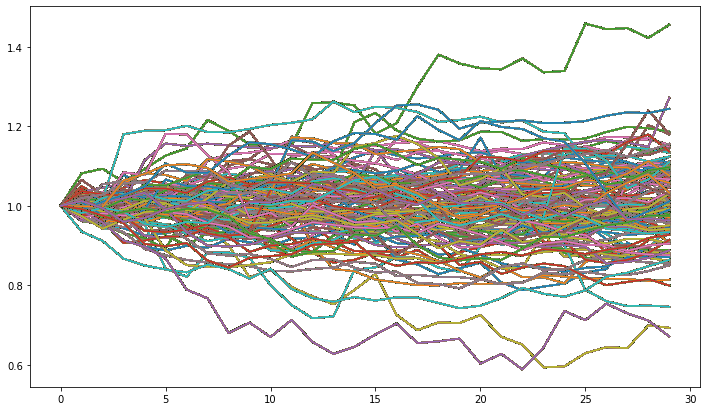

In [ ]:
plt.figure(figsize = (12,7))
x = np.arange(0,stock_array.shape[1])
for i in range(stock_array.shape[0]):
  plt.plot(x,stock_array[i,:]/stock_array[i,0])
plt.show()

In [ ]:
np.random.shuffle(stock_array)

In [ ]:
import pickle
with open('SP_all_daily_30day_stock_array.pkl','wb') as f:
  pickle.dump(stock_array, f)

In [ ]:
stock_array.shape

(62625, 30)